# ELEC 221 Assignment 6: radio 

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio, Image
from IPython.core.display import HTML

In this problem, you'll implement a simulated AM radio system that is a little more realistic in terms of the operation of the receiver and demodulation process. 

Suppose you and your colleague have been put in charge of a radio broadcast company that manages 5 stations at the following frequencies (in kHz): 580, 600, 620, 640, and 660. Note that typically, AM is used for talk radio, which requires a bandwidth of ~10 kHz. However to make things interesting, we're going to use music which requires a wider range.

**Question 0.1 (1 point)**. To make things more meaningful for you (hopefully!), choose five songs, perhaps of different genres, for your radio stations. Select ~4-5s clips of each, and use a sampling rate of somewhere between 40000-48000.

In [198]:
# Prepare some samples and load them in here.
# input_audio = wavfile.read("my_song.wav") 

# The result of importing a wavfile should be a tuple of two elements:
# the sample rate, and the audio signal, which may be have multiple channels.
# sample_rate = input_audio[0]

# My audio sample had multiple channels. Yours may not.
# In my case, I took just one of these channels, and converted it from 
# integer values to floats.
# channel_0 = input_audio[1][:, 0]
# song_1 = np.array(channel_0, dtype=np.float64) / np.max(channel_0)

In [199]:
song_1 = wavfile.read("starwalkin.wav")
song_2 = wavfile.read("outoftime.wav")
song_3 = wavfile.read("treacheroustaylors.wav")
song_4 = wavfile.read("alltoowell.wav")
song_5 = wavfile.read("beijingwelcomesyou.wav")

In [200]:
sample_rate = song_1[0]
channels = [] # created array of channels to make radio broadcast, as in part 2
min_length = 239520

channels.append(song_1[1][:,0])
##song_1 = np.array(song_1[1][:,0], dtype=np.float64) / np.max(song_1[1][:,0])
song_1 = np.array(channels[0], dtype=np.float64)[:min_length] / np.max(channels[0])

channels.append(song_2[1][:,0])
##song_2 = np.array(song_2[1][:,0], dtype=np.float64) / np.max(song_2[1][:,0])
song_2 = np.array(channels[1], dtype=np.float64)[:min_length] / np.max(channels[1])

channels.append(song_3[1][:,0])
##song_3 = np.array(song_3[1][:,0], dtype=np.float64) / np.max(song_3[1][:,0])
song_3 = np.array(channels[2], dtype=np.float64)[:min_length] / np.max(channels[2])

channels.append(song_4[1][:,0])
##song_4 = np.array(song_4[1][:,0], dtype=np.float64) / np.max(song_4[1][:,0])
song_4 = np.array(channels[3], dtype=np.float64)[:min_length] / np.max(channels[3])

channels.append(song_5[1])
##song_5 = np.array(song_5[1], dtype=np.float64) / np.max(song_5[1])
song_5 = np.array(channels[4], dtype=np.float64)[:min_length] / np.max(channels[4])

In [180]:
Audio(song_1, rate=sample_rate)

In [181]:
Audio(song_2, rate=sample_rate)

In [182]:
Audio(song_3, rate=sample_rate)

In [183]:
Audio(song_4, rate=sample_rate)

In [184]:
Audio(song_5, rate=sample_rate)

Text(0, 0.5, 'Real Spectrum of Song #1')

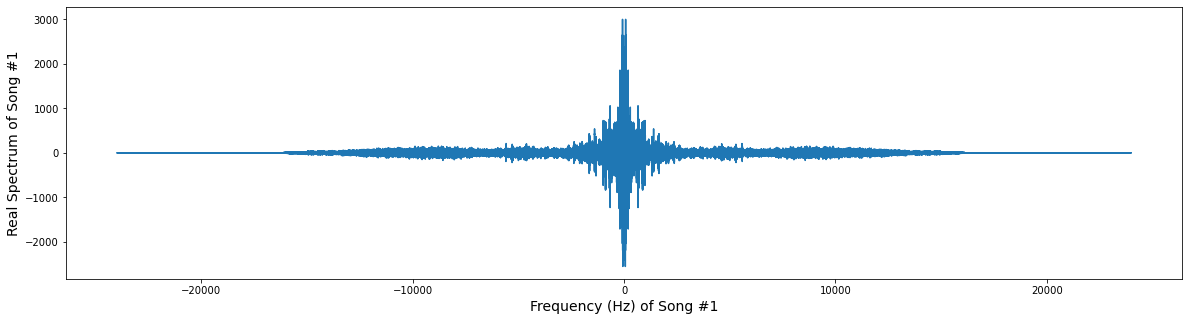

In [185]:
frequencies = np.fft.fftfreq(len(song_1), 1/sample_rate)
spectrum = np.fft.fft(song_1)

plt.figure(figsize=(20, 5))
plt.plot(frequencies, spectrum.real)
plt.xlabel("Frequency (Hz) of Song #1", fontsize=14)
plt.ylabel("Real Spectrum of Song #1", fontsize=14)

## Part 1. The broadcast

We will begin by setting up the broadcast process according to the following block diagram:

<img src="broadcast.png" width=700>

We'll do this in a couple different steps.

**Question 1.1 (1 point)**. First, design a lowpass filter to reduce the bandwidth of a signal to within the acceptable range of our radio stations.

In [201]:
def reduce_signal_bandwidth(signal, sample_rate):
    """Reduce the bandwidth of a signal to within a ~20 kHz band.
    
    Here, 20 kHz corresponds to the space a signal will take when considering
    both positive and negative frequencies, like we have seen during the 
    amplitude modulation lectures in class. 
    
    It is up to you to decide how to filter it. You may choose to use an 
    ideal brick wall filter, or a more realistic non-ideal filter (it doesn't
    need to be exactly 20 kHz wide, just something appropriate for the
    application).
    
    Args:
        signal (array[float]): A real-valued signal.
        sample_rate (int): The sample rate
        
    Returns:
        array[float]: A signal that has been filtered so that its spectrum is 
        band-limited. 
    """
    max_frequency = 10000
    spectrum = np.fft.fft(signal, norm="forward")
    frequencies = np.fft.fftfreq(len(signal), 1 / sample_rate)
    
    result = []
    
    for i in range(len(spectrum)):
      if np.abs(frequencies[i]) <= max_frequency:
        result.append(spectrum[i])
      else:
        result.append(0)

    return np.fft.ifft(result, norm="forward")

C:\Users\joshl\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Real Spectrum of Song #1')

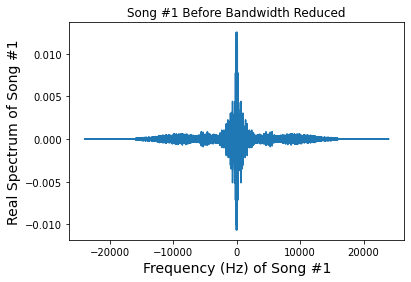

In [187]:
# Testing Problem 1.1 (Plotting Song #1 Before Bandwidth Reduced)
plt.plot(np.fft.fftfreq(len(song_1), 1 / sample_rate), np.fft.fft(song_1, norm="forward"))
plt.title("Song #1 Before Bandwidth Reduced")
plt.xlabel("Frequency (Hz) of Song #1", fontsize=14)
plt.ylabel("Real Spectrum of Song #1", fontsize=14)

C:\Users\joshl\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Real Spectrum of reduced Song #1')

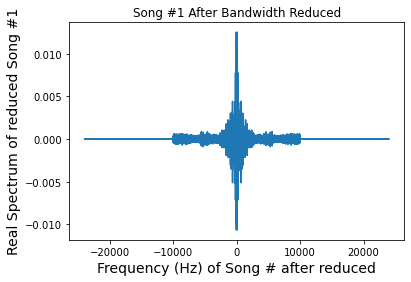

In [188]:
# Testing Problem 1.1 (Plotting Song #1 After Bandwidth Reduced)
plt.plot(np.fft.fftfreq(len(song_1), 1 / sample_rate), np.fft.fft(reduce_signal_bandwidth(song_1, sample_rate), norm="forward"))
plt.title("Song #1 After Bandwidth Reduced")
plt.xlabel("Frequency (Hz) of Song # after reduced", fontsize=14)
plt.ylabel("Real Spectrum of reduced Song #1", fontsize=14)

In [189]:
# Testing Problem 1.1 (Playing Song #1 with Reduced Bandwidth)
song = reduce_signal_bandwidth(song_1, sample_rate)

Audio(song, rate=sample_rate)

C:\Users\joshl\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


**Question 1.2 (1 point)** Implement a function that performs sinusoidal amplitude modulation (with a $\cos$ carrier signal) of a signal into the frequency range of a desired radio station.

In [202]:
def sinusoidal_amplitude_modulation(signal, station_frequency, sample_rate, phase=0.0):
    """Modulate a signal up to the frequency of a desired AM radio station.
    
    The amplitude modulation should have the form:
       y(t) = x(t) * c(t) = x(t) * cos(2 * π * f_c * t + θ_c) 
    where f_c is the carrier (station) frequency, and θ_c is a phase.
    
    Args:
        signal (array[float]): A real-valued signal.
        station_frequency (int): The (carrier) frequency of the station, in kHz.
        sample_rate (int): The sample rate
        phase (float): The phase of the carrier signal. 
        
    Returns:
        array[float]: The modulated signal.
    """
    ##import scipy
    ##upsampled_signal = scipy.signal.resample(signal, 2 * (station_frequency * 1000 + 10000) * 5)
    carrier_signal = []
    
    for i in range(len(signal)):
        carrier_signal.append(np.cos(2 * np.pi * station_frequency * 1000 * i / sample_rate + phase))
    
    output = np.multiply(signal, carrier_signal)
    
    # frequencies_2 = np.fft.fftfreq(len(output), 1/(sample_rate))
    # spectrum_2 = np.fft.fft(output)

    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies_2, spectrum_2.real)
    # plt.xlabel("Frequency (Hz)", fontsize=14)
    
    return output

Text(0, 0.5, 'Real Spectrum of Modulated Song #1')

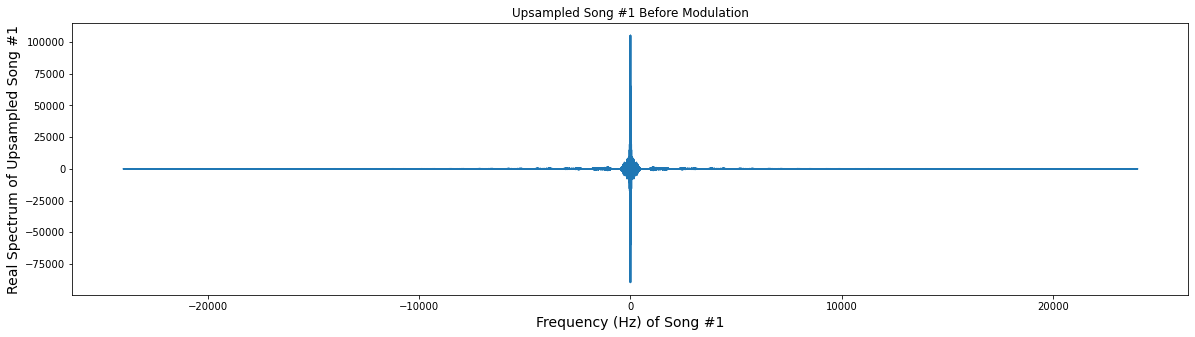

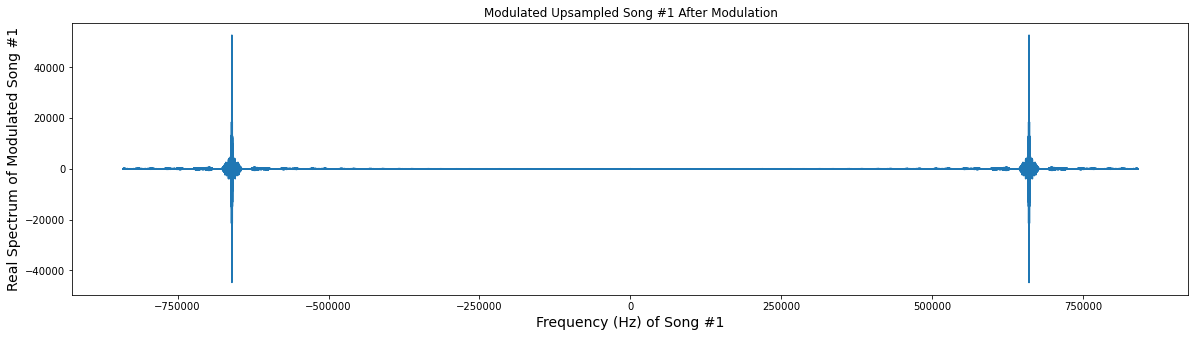

In [191]:
# Testing Problem 1.2 (Plotting Song #1 Before/After Modulation)
# Note: I first have to upsample the original song before modulating it or aliasing will occur
upsample = 35
upsampled_song = np.repeat(song_1, upsample)
frequencies_1 = np.fft.fftfreq(len(upsampled_song), 1/(sample_rate))
spectrum_1 = np.fft.fft(upsampled_song)

station_frequency = 660
modulated_song_1 = sinusoidal_amplitude_modulation(upsampled_song, station_frequency, sample_rate * upsample)
frequencies_2 = np.fft.fftfreq(len(modulated_song_1), 1/(sample_rate * upsample))
spectrum_2 = np.fft.fft(modulated_song_1)

plt.figure(figsize=(20, 5))
plt.plot(frequencies_1, spectrum_1.real)
plt.title("Upsampled Song #1 Before Modulation")
plt.xlabel("Frequency (Hz) of Song #1", fontsize=14)
plt.ylabel("Real Spectrum of Upsampled Song #1", fontsize=14)

plt.figure(figsize=(20, 5))
plt.plot(frequencies_2, spectrum_2.real)
plt.title("Modulated Upsampled Song #1 After Modulation")
plt.xlabel("Frequency (Hz) of Song #1", fontsize=14)
plt.ylabel("Real Spectrum of Modulated Song #1", fontsize=14)

**Question 1.3 (1 point)**. Your radio company will use frequency-division multiplexing (FDM) to send multiple signals over the same channel. Using the frequencies listed above, implement a broadcast (transmission) system that takes a set of signals as input, and outputs the full radio broadcast.

In [203]:
def broadcast(signals, sample_rate):
    """Broadcast a set of signals at different frequencies to simulate 
    a set of radio stations.
    
    This function should:
      - reduce the bandwidth of each of the provided signals
      - modulate each one to the correct frequency range
      - perform FDM to generate a combined output signal to be broadcast
    print
    Args:
        signals (list[array[float]]): A list of signals to be transmitted. 
             Assume that they are provided in order of increasing station frequency.
        sample_rate (int): The sample rate
    
    Returns:
        array[float]: A single channel contain the frequency-division multiplexed
        set of signals.
    """
    upsample = 35
    station_frequencies = [580, 600, 620, 640, 660]
    result = np.zeros_like(len(np.repeat(signals[0], upsample)), dtype=np.complex128)
    
    for i in range(len(signals)):
        upsampled_signal = np.repeat(signals[i], upsample)
        result = result + sinusoidal_amplitude_modulation(upsampled_signal, station_frequencies[i], sample_rate * upsample) 

    return result

Text(0, 0.5, 'Real Spectrum of Songs #1-5')

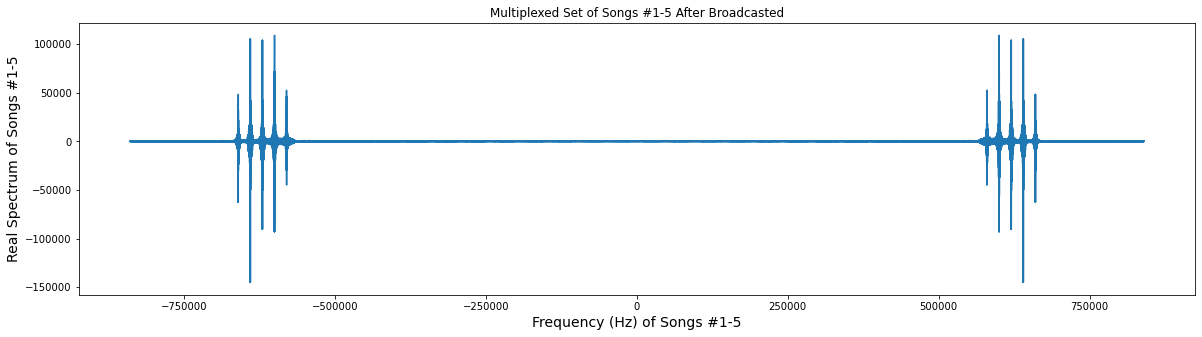

In [193]:
# Testing Problem 1.3 (Plotting Songs #1-5 After Broadcasted)
signals = [song_1, song_2, song_3, song_4, song_5]
broadcast_signals = np.zeros_like(signals)
upsample = 35

# print(len(song_1))
# print(len(song_2))
# print(len(song_3))
# print(len(song_4))
# print(len(song_5))

broadcast = broadcast(signals, sample_rate)
broadcast_frequencies = np.fft.fftfreq(len(broadcast), 1/(sample_rate * upsample))
broadcast_spectrum = np.fft.fft(broadcast)

plt.figure(figsize=(20, 5))
plt.plot(broadcast_frequencies, broadcast_spectrum.real)
plt.title("Multiplexed Set of Songs #1-5 After Broadcasted")
plt.xlabel("Frequency (Hz) of Songs #1-5", fontsize=14)
plt.ylabel("Real Spectrum of Songs #1-5", fontsize=14)

## Part 2. A simple receiver

In order to test your broadcasting setup, let's implement a simple synchronous demodulation system.

**Question 2.1 (1 point)** Complete the function below to implement the synchronous demodulation system that we described in class (see the docstring below for details). 

In [209]:
def simple_receiver(broadcast, station_frequency, sample_rate, phase=0.0, bandpass=True):
    """Demodulate the radio broadcast and extract a desired station.
    
    This function should:
      - apply a bandpass filter (if specified) to the signal to extract
        only the parts of the spectrum in the desired station's frequency range
      - demodulate with a sinusoidal carrier (use cos) at the desired frequency
      - apply a low-pass filter with the appropriate gain to recover the signal
    
    Args:
        broadcast (array[float]): A radio broadcast consisting of five channels
            that have been FD multiplexed.
        station_frequency (int): The frequency (in kHz) of the radio station.
        phase (float): The phase of the demodulating signal.
        bandpass (bool): Whether or not to apply a bandpass filter before
            demodulating and filtering.
    
    Returns:
        array[float]: The signal of the radio station at the desired frequency.
    """
    frequencies = np.fft.fftfreq(len(broadcast), 1/(sample_rate*35))
    spectrum = np.fft.fft(broadcast)
    max_frequency = 10000
    upsample = 35

    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies, spectrum.real)
    # plt.xlabel("Frequency (Hz)", fontsize=14)

    # Step #1: Applying the bandpass filter if true
    if bandpass:
      bandPass = np.zeros(len(spectrum), dtype=np.complex128)
      for i in range(len(spectrum)):
        if np.abs(frequencies[i]) <= max_frequency + station_frequency*1000 and np.abs(frequencies[i]) >= station_frequency*1000 - max_frequency:
          bandPass[i] = spectrum[i]

    else:
      bandPass = spectrum

    song = np.fft.ifft(bandPass)

    frequencies2 = np.fft.fftfreq(len(song), 1/(sample_rate*upsample))
    spectrum2 = np.fft.fft(song)

    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies2, spectrum2.real)
    # plt.xlabel("Frequency (Hz)", fontsize=14)
    
    # Step #2: Demodulating the song
    shifted = np.zeros(len(song), dtype=np.complex128)
    for i in range(len(song)):
        shifted[i] = (song[i] * np.cos(2*np.pi*station_frequency*1000*i/(sample_rate*35) + phase))

    decimated = np.zeros(int(np.floor(len(shifted)/upsample)))
    for i in range(len(shifted)):
      j = int(i/upsample)
      if i % upsample == 0:
        decimated[j] = shifted[i]

    frequencies3 = np.fft.fftfreq(len(decimated), 1/(sample_rate))
    spectrum3 = np.fft.fft(decimated)
    max_freq = 8000

    plt.figure(figsize=(20, 5))
    plt.plot(frequencies3, spectrum3.real)
    plt.xlabel("Frequency (Hz)", fontsize=14)

    filter = np.zeros(len(spectrum3), dtype=np.complex128)

    # Step #3: Applying the low-pass filter
    for i in range(len(frequencies3)):
      if np.abs(frequencies3[i]) <= max_frequency:
        filter[i] = spectrum3[i]

    frequencies4 = np.fft.fftfreq(len(filter), 1/(sample_rate))
    spectrum4 = filter

    plt.figure(figsize=(20, 5))
    plt.plot(frequencies4, spectrum4.real)
    plt.xlabel("Frequency (Hz)", fontsize=14)

    return np.fft.ifft(filter)

**Question 2.2 (0.5 point)**. Test your demodulation function below to extract the 600 kHz station.

C:\Users\joshl\AppData\Local\Temp/ipykernel_6000/3431799179.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  decimated[j] = shifted[i]
C:\Users\joshl\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


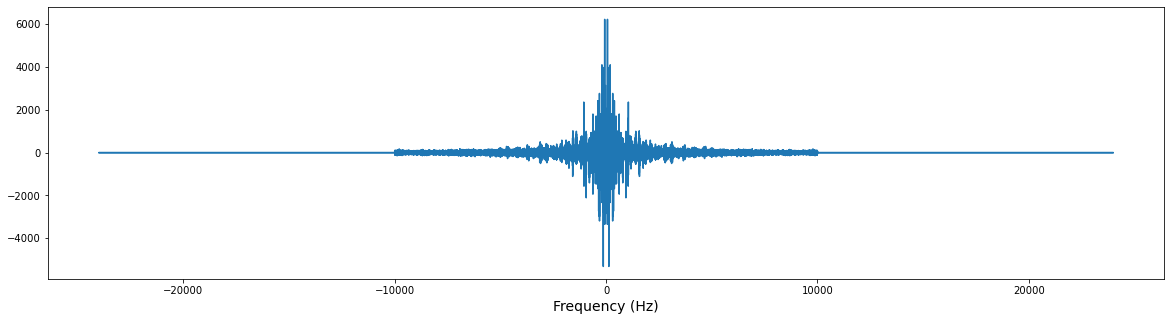

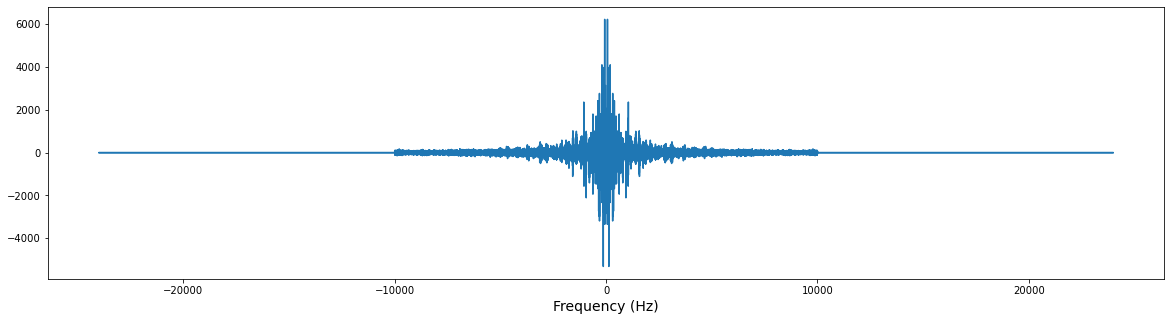

In [210]:
signals = [song_1, song_2, song_3, song_4, song_5]
station_frequency = 600
upsample = 35

song1 = reduce_signal_bandwidth(song_1, sample_rate)
song2 = reduce_signal_bandwidth(song_2, sample_rate)
song3 = reduce_signal_bandwidth(song_3, sample_rate)
song4 = reduce_signal_bandwidth(song_4, sample_rate)
song5 = reduce_signal_bandwidth(song_5, sample_rate)

broadcast_1 = broadcast(signals, sample_rate)

frequencies_2 = np.fft.fftfreq(len(broadcast_1), 1/(sample_rate*upsample))
spectrum_2 = np.fft.fft(broadcast_1)

# plt.figure(figsize=(20, 5))
# plt.plot(frequencies_2, spectrum_2.real)
# plt.xlabel("Frequency (Hz)", fontsize=14)

Audio(simple_receiver(broadcast_1, station_frequency, sample_rate, 0.0, True), rate=sample_rate)

**Question 2.3 (0.5 point)**. Test your demodulation function with a non-zero phase; what happens to the output signal when the modulation and demodulation are not perfectly in sync?

**When the modulation and demodulation are not perfectly in sync (i.e the phase is non-zero), the following happens:**

*   **Signal sounds similar to the original, but it sounds a little distorted or the volume is slightly different.**
*   **Some of the details of the song are preserved, but the volume can change (become very faint or loud) depending on which phase is used.**
*   **The signal is becomes very quiet and fuzzy as the phase difference approaches pi/2.**


C:\Users\joshl\AppData\Local\Temp/ipykernel_6000/3431799179.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  decimated[j] = shifted[i]
C:\Users\joshl\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


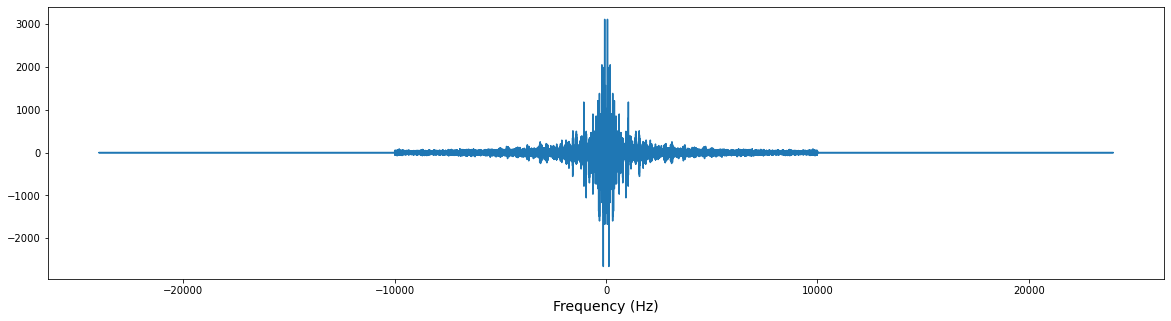

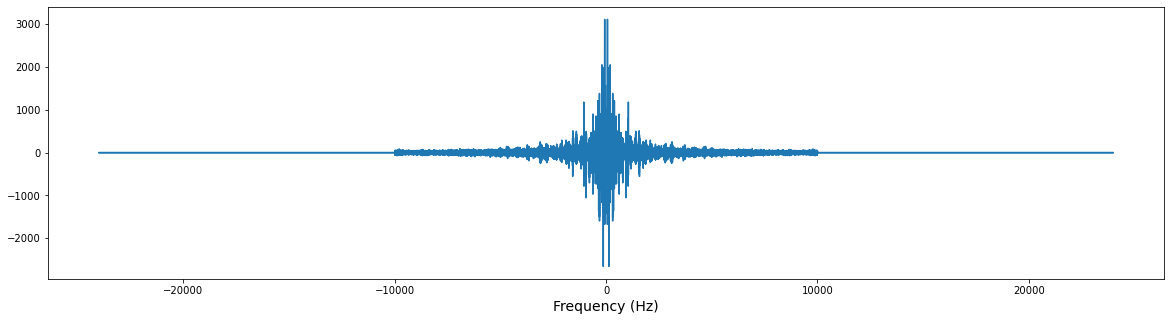

In [211]:
station_frequency = 600
Audio(simple_receiver(broadcast_1, station_frequency, sample_rate, np.pi/3, True), rate=sample_rate)

**Question 2.4 (0.5 point)**. Set `bandpass=False` and test the demodulation; how does it sound?

**With bandpass=false, you can still hear the original song, but you can hear some additional sound that was not filtered out from before.**

C:\Users\joshl\AppData\Local\Temp/ipykernel_6000/3431799179.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  decimated[j] = shifted[i]
C:\Users\joshl\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


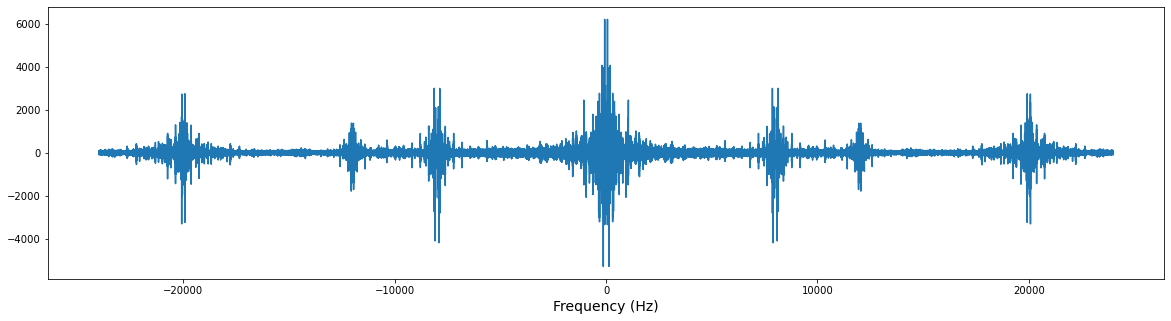

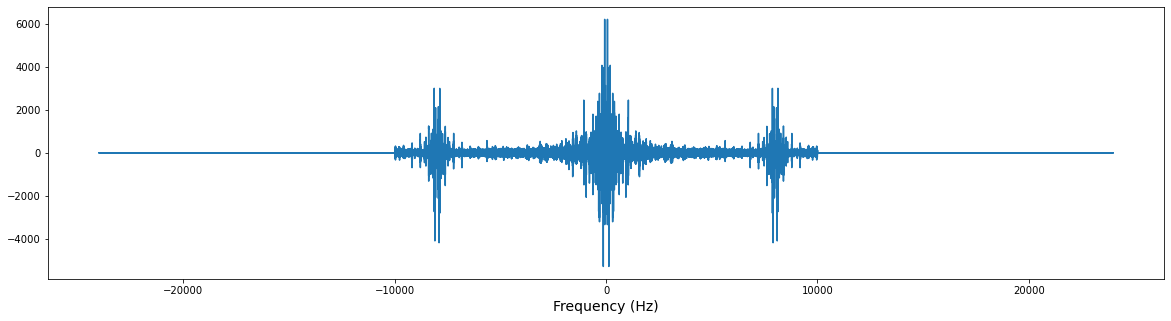

In [212]:
Audio(simple_receiver(broadcast_1, 600, sample_rate, 0, False), rate=sample_rate)

**Question 2.5 (0.5 point)**. Try demodulating with an invalid station frequency (e.g., 590, 610, anything that sits in between our allotted values). Does this sound like you expect?

**With an invalid station frequency like 590, it sounds like a distorted version of the two adjacent channels superimposed. This should be expected since the signal is a collection of both songs.**

C:\Users\joshl\AppData\Local\Temp/ipykernel_6000/3431799179.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  decimated[j] = shifted[i]
C:\Users\joshl\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


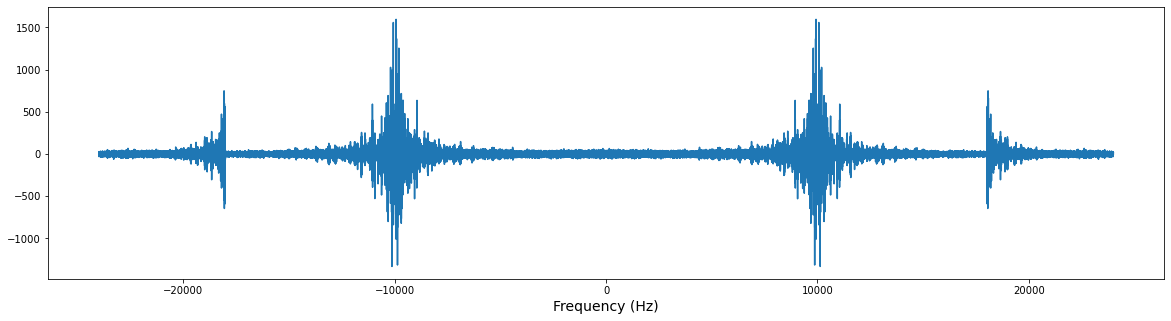

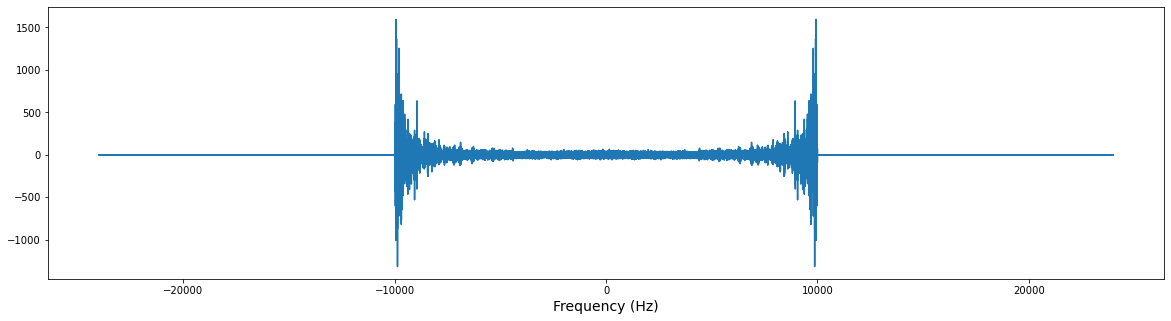

In [213]:
Audio(simple_receiver(broadcast_1, 590, sample_rate, 0, True), rate=sample_rate)

## Part 3: the superheterodyne receiver

In practice, AM radio is demultiplexed and demodulated by a system called the [superheterodyne receiver](https://en.wikipedia.org/wiki/Superheterodyne_receiver) (or superhet for short). Consider the (simplified) diagram below (there should in principle be some amplifiers in here, but we will ignore them):

<img src="superhet.png" width="800">

Here, $y(t)$ corresponds to the multiplexed signal that your broadcast outputs. This is put through a coarse tunable bandpass filter (this corresponds to you turning the radio dial), then mixed with a variable-frequency local oscillator to produce a signal centered at an intermediate frequency (IF) of 455 kHz. Said signal is then put through a fixed bandpass filter before being sent to the demodulator.

**Question 3.0 (0.5 point)**: Why do you think this kind of setup is used; why not just use a simple tunable filter from the get go? (You may need to do a little research on the history of the development of radio.)

**This type of setup is used because it has better selectivity and high efficiency. Having an intermediate processing step of isolating the desired signal and shifting it to 455 kHz helps us get rid of undesired frequencies from other signals that may bleed in to the 20kHz band for each station, and this gives us a clearer audio output.**

**Question 3.1 (1 point)**: Implement the heterodyning process in the the graphic above. The function should take the multiplexed signal as input and a desired radio station frequency, and output the demodulated audio signal.

In [214]:
def superhet_receiver(radio_broadcast, station_frequency, sample_rate):
    """Implement a simplified superheterodyne receiver to extract a desired station.
    
    This function should:
      - apply a bandpass filter to the signal to extract the correct 
        frequency regime 
      - use a local oscillator (frequency related to the bandpass) to yield an
        intermediate frequency signal at 455 kHz
      - apply a fixed bandpass filter and then demodulate to recover the station
    
    Args:
        broadcast (array[float]): A radio broadcast consisting of five channels
            that have been FD multiplexed.
        station_frequency (int): The frequency (in Hz) of the radio station.
    
    Returns:
        array[float]: The signal of the radio station at the desired frequency.
    """

    # Step #1: Bandpass filter
    max_frequency = 10000
    upsample = 35
    frequencies = np.fft.fftfreq(len(radio_broadcast), 1/(sample_rate*upsample))
    spectrum = np.fft.fft(radio_broadcast)
    bandPass = np.zeros(len(spectrum), dtype=np.complex128)
    for i in range(len(spectrum)):
        if np.abs(frequencies[i]) <= max_frequency + station_frequency*1000 and np.abs(frequencies[i]) >= station_frequency*1000 - max_frequency:
            bandPass[i] = spectrum[i]

    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies, spectrum.real)
    # plt.xlabel("Initial input", fontsize=14)

    # Step #2: Local oscillator
    song = np.fft.ifft(bandPass)
    frequencies2 = np.fft.fftfreq(len(song), 1/(sample_rate*upsample))
    spectrum2 = np.fft.fft(song)
    shifted = np.zeros(len(song), dtype=np.complex128)
    for i in range(len(song)):
        shifted[i] = (song[i] * np.cos(2*np.pi*(station_frequency-455)*1000*i/(sample_rate*upsample)))
    
    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies2, spectrum2.real)
    # plt.xlabel("Bandpass #1", fontsize=14)

    # Step #3: Another bandpass filter
    frequencies3 = np.fft.fftfreq(len(shifted), 1/(sample_rate*upsample))
    spectrum3 = np.fft.fft(shifted)
    bandPass2 = np.zeros(len(spectrum3), dtype=np.complex128)
    for i in range(len(spectrum3)):
        if np.abs(frequencies3[i]) <= max_frequency + 455*1000 and np.abs(frequencies3[i]) >= 455*1000 - max_frequency:
            bandPass2[i] = spectrum3[i]

    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies3, spectrum3.real)
    # plt.xlabel("Local Oscillator", fontsize=14)

    frequencies4 = np.fft.fftfreq(len(bandPass2), 1/(sample_rate*upsample))
    spectrum4 = np.fft.fft(bandPass2)

    # plt.figure(figsize=(20, 5))
    # plt.plot(frequencies4, spectrum4.real)
    # plt.xlabel("Bandpass #2", fontsize=14)

    return simple_receiver(np.fft.ifft(bandPass2), 455, sample_rate, phase=0.0, bandpass=False)

**Question 3.2 (0.5 point)**: Let's put everything together: below, use the broadcast function to create a signal, and then pass it to the superheterodyne receiver to play your favourite station. 

C:\Users\joshl\AppData\Local\Temp/ipykernel_6000/3431799179.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  decimated[j] = shifted[i]
C:\Users\joshl\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


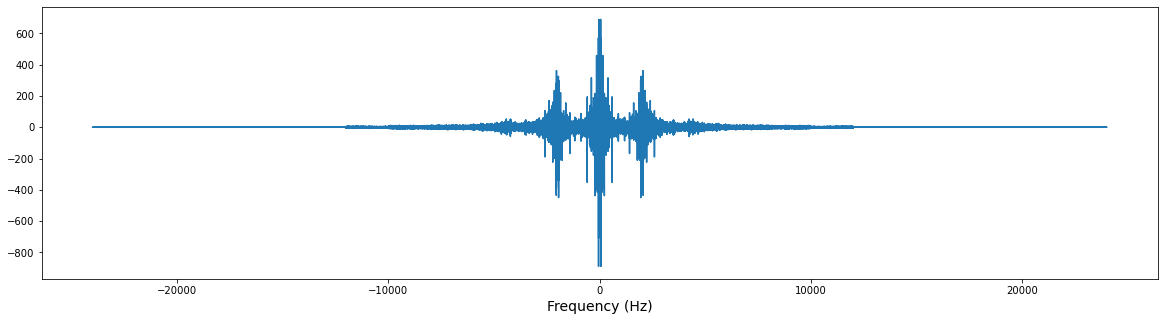

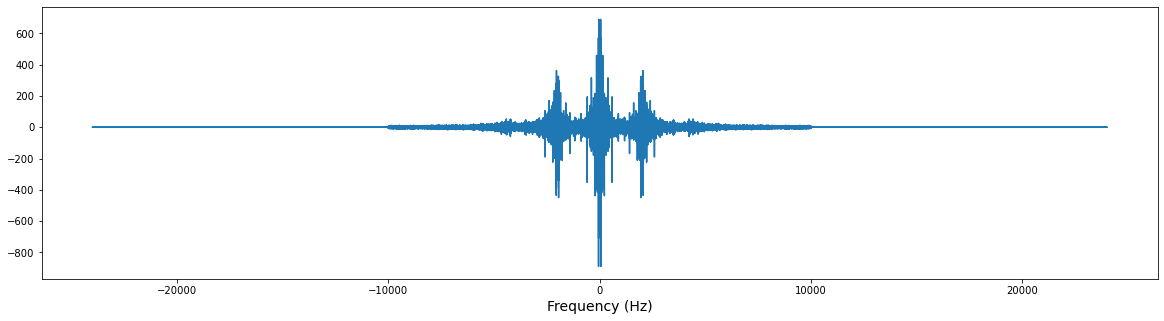

In [215]:
Audio(superhet_receiver(broadcast_1, 660, sample_rate), rate=sample_rate)